In [1]:
# brew install poppler
# pip install byaldi pdf2image

In [2]:
import os
from pathlib import Path
from byaldi import RAGMultiModalModel

model = RAGMultiModalModel.from_pretrained("vidore/colqwen2-v1.0",device='cpu')

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# Use ColQwen2 to index and store the pdf
model.index(
    input_path = "./docs/2312.10997.pdf",
    index_name = "rag_survey",
    store_collection_with_index = True, # Stores base64 images along with the vectors
    overwrite = True
)

overwrite is on. Deleting existing index rag_survey to build a new one.
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Index exported to .byaldi/rag_survey
Index exported to .byaldi/rag_survey


{0: 'docs/2312.10997.pdf'}

In [4]:
query = "what is the benchmark results for RAG evaluation frameworks"
results = model.search(
    query, 
    k = 1
)

query_img_base64 = results[0]['base64']

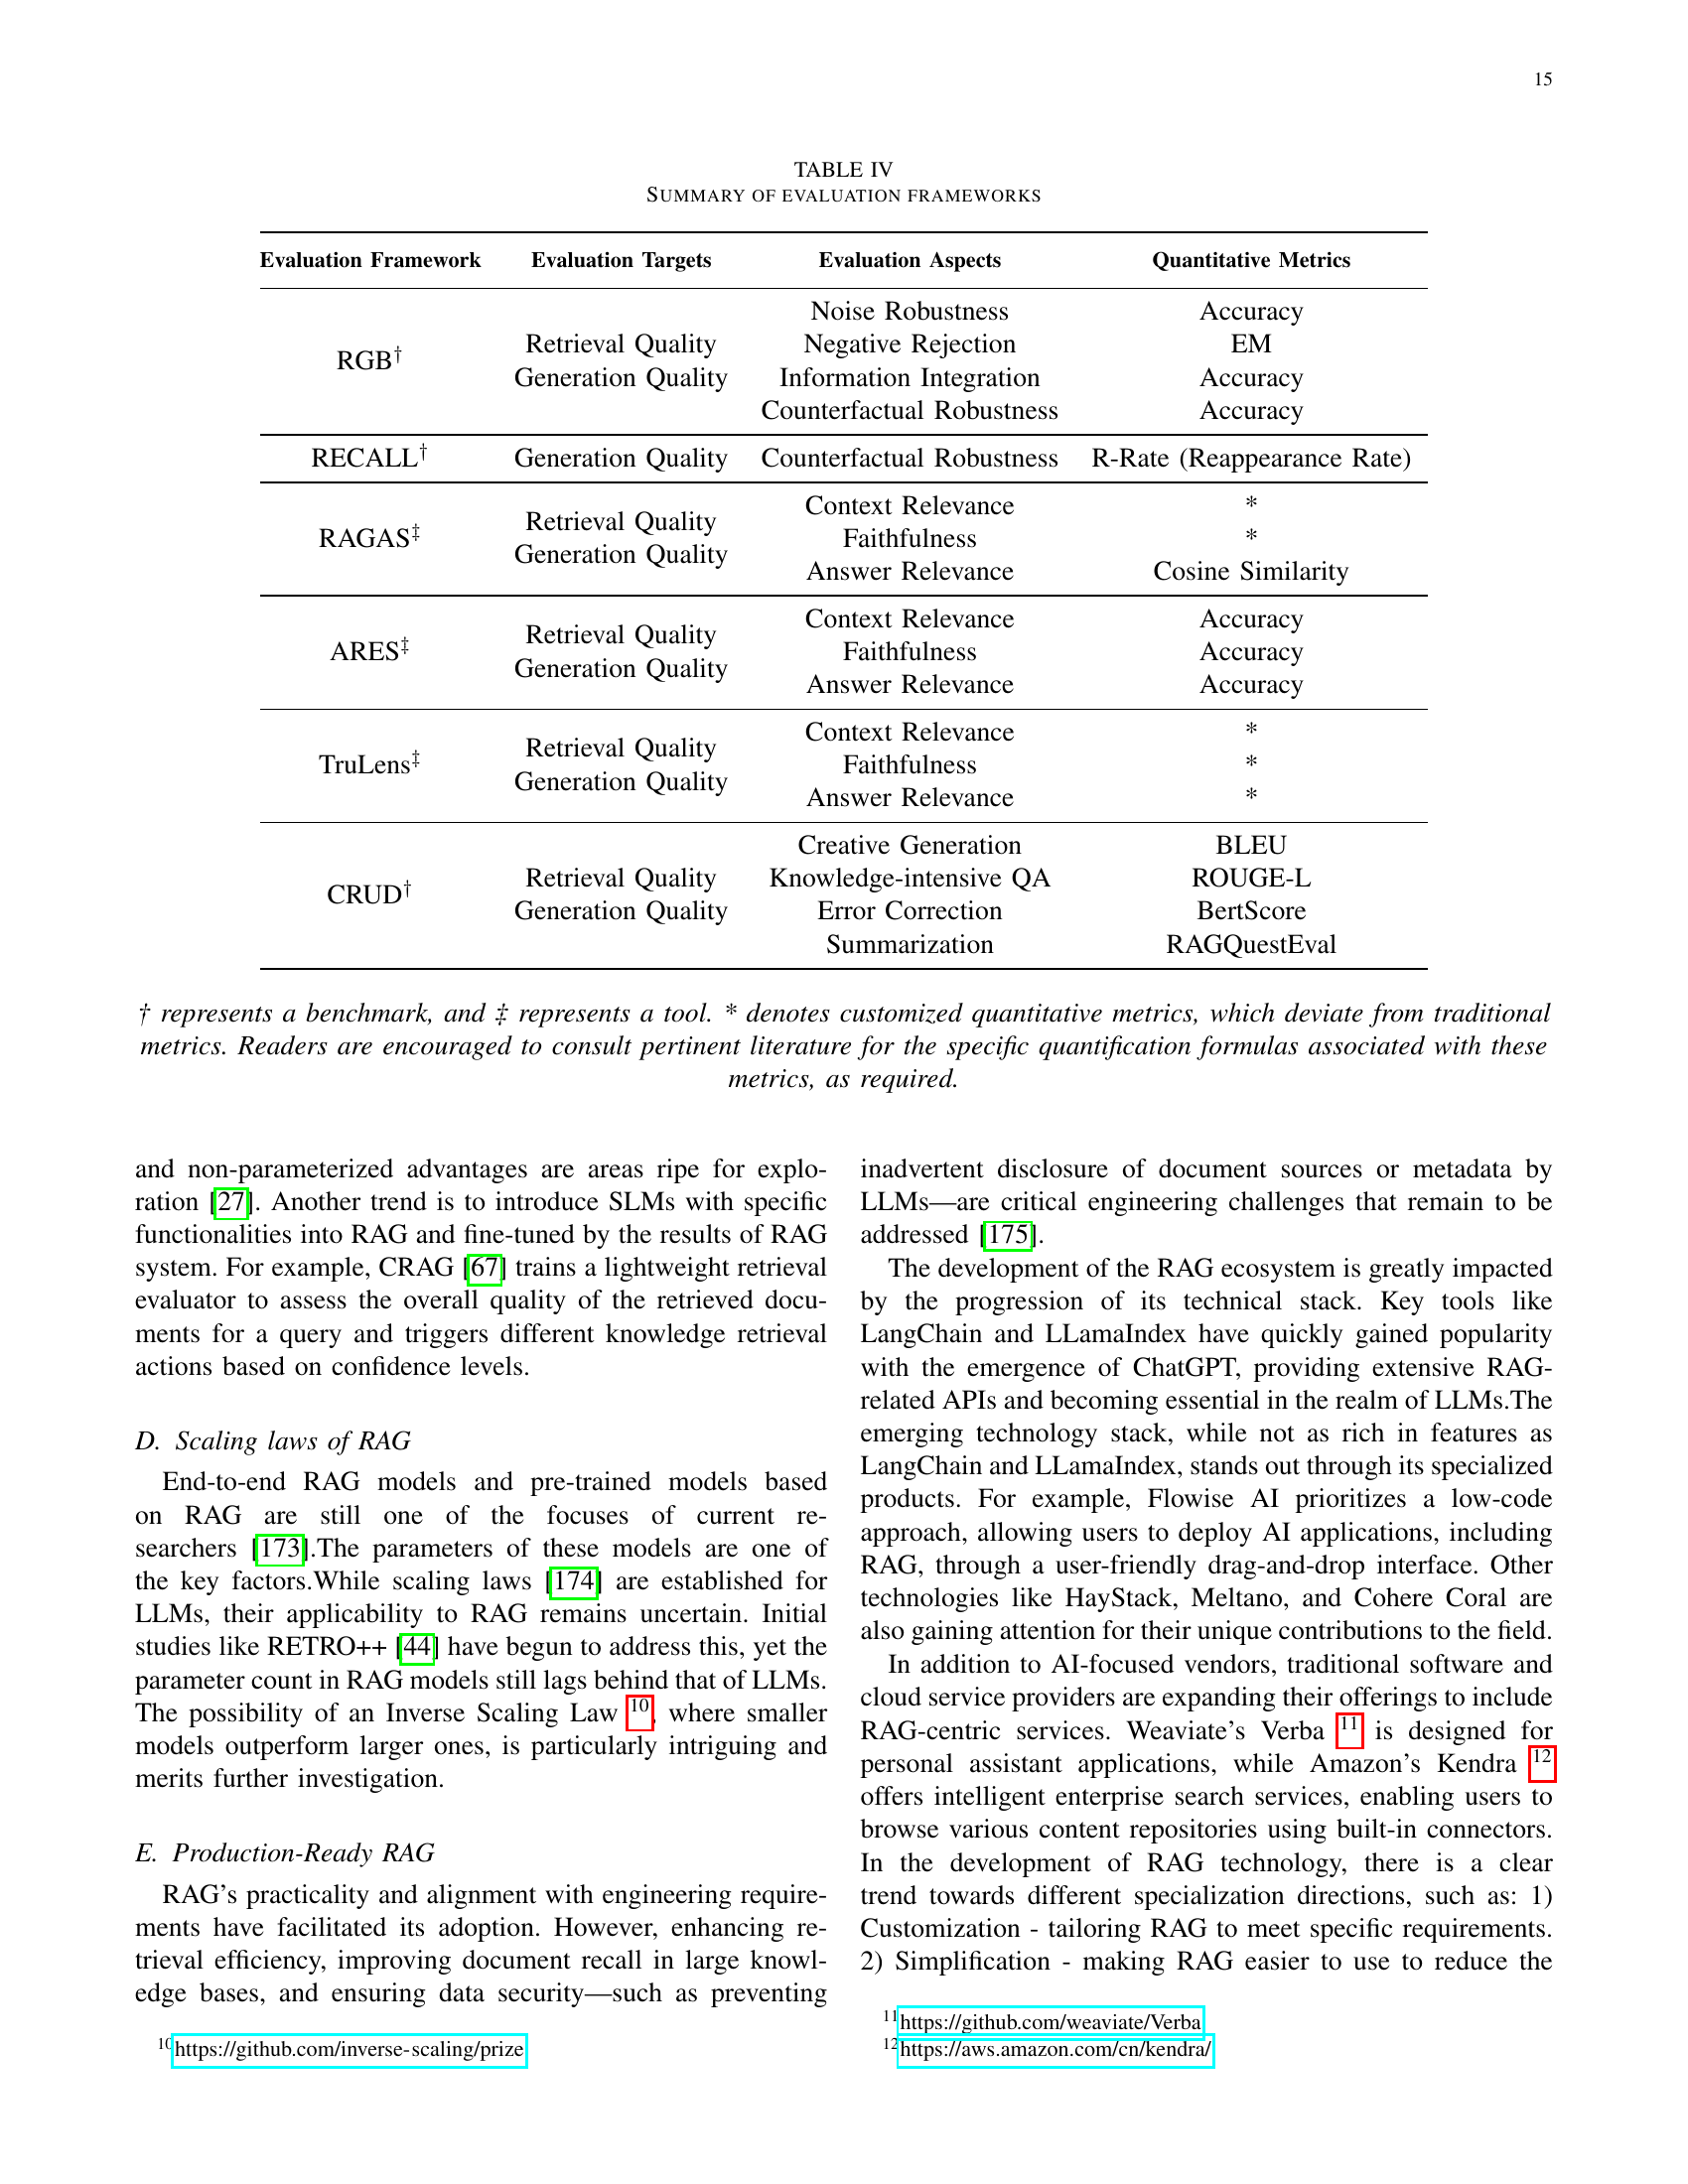

In [5]:
import base64
from IPython.display import Image

def save_and_display_image(img_base64):
    image_bytes = base64.b64decode(img_base64)
    filename = 'results/image.jpg'
    with open(filename, 'wb') as f:
        f.write(image_bytes)
    display(Image(filename))

save_and_display_image(query_img_base64)

In [6]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llava_llm = ChatOllama(model="llava:13b", temperature=0.5)
gemma_llm = ChatOllama(model="gemma3:27b", temperature=0.5)

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{query_img_base64}"},
        },
    ],
)

In [7]:
llava_response = llava_llm.invoke([message])

print(llava_response.content)

 The image you've provided appears to be a page from an academic paper or report. It includes a table with benchmark results for RAG (Risk Assessment Grid) evaluation frameworks, which are used in software engineering and project management to assess risk levels within a project or organization. However, the text is too small and blurry to read the specific details of the benchmark results. If you can provide a clearer image or the specific details from the table, I would be happy to assist you further.


In [8]:
gemma_response = gemma_llm.invoke([message])

print(gemma_response.content)

Here's a breakdown of the benchmark results for RAG evaluation frameworks based on the provided table:

**Here's a summary of the benchmark results from the table:**

*   **RGB:** Evaluates Retrieval Quality and Generation Quality. Uses metrics like Accuracy, EM (Exact Match), and Accuracy.
*   **RECALL:** Evaluates Generation Quality. Uses R-Rate (Reappearance Rate) as a metric.
*   **RAGAS:** Evaluates Retrieval Quality and Generation Quality. Uses Cosine Similarity as a metric.
*   **ARES:** Evaluates Retrieval Quality and Generation Quality. Uses Accuracy as a metric.
*   **TrueLens:** Evaluates Retrieval Quality and Generation Quality. Uses Accuracy as a metric.
*   **CRUD:** Evaluates Retrieval Quality and Generation Quality. Uses BLEU, ROUGE-L, BERTScore, and RAGQuestEval as metrics.

**Important Note:**

The table indicates that the asterisk (*) denotes customized quantitative metrics, which deviate from traditional metrics. Readers are encouraged to consult the specific quanti